#                            HEART ATTACK POSSIBILITY
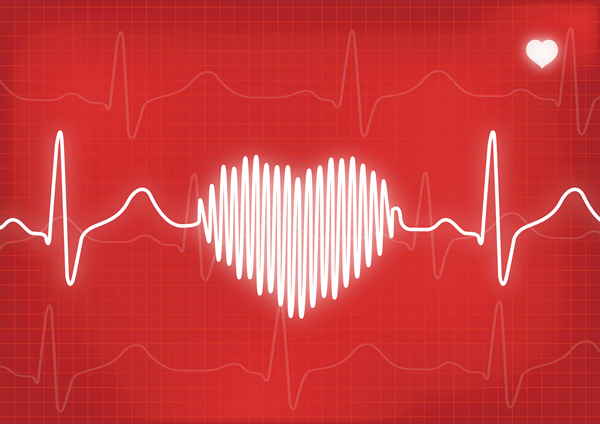


# IMPORTING LIBRARIES

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import shap
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split

# READING DATASET

In [ ]:
df=pd.read_csv('../input/health-care-data-set-on-heart-attack-possibility/heart.csv')
df.describe()

# CREATING MORE UNDERSTANDABLE FEATURES

In [ ]:
def age(row):
    if row<=40:
        return 1
    if row>40 and row<=60:
        return 2
    if row>60:
        return 3    

In [ ]:
def co(row):
    if row<200:
        return 1
    if row>=200and row<239:
        return 2
    if row>=239:
        return 3    

In [ ]:
df['agetype']=df['age'].apply(age)
df['cholevel']=df['chol'].apply(co)

In [ ]:
df.head()

# EDA

Minimum age of a person which is more likely to have heart attack?

In [ ]:
df.loc[df.target== 1].age.min()

Which age type had most heart attacks?

In [ ]:
df.loc[(df.target== 1)].agetype.value_counts()

Which type of chest pain is more severe according to the data?

In [ ]:
df.loc[(df.target== 1)].cp.value_counts()

How many people had heart attack when there cholestrol level is normal?

In [ ]:
df.loc[(df.cholevel == 1) & (df.target== 1)].sum()

30 people had heart attack.

Which sex is more vulnerable towards heart attack?

In [ ]:
df.loc[(df.target== 1)].sex.value_counts()

# DATA VISUALISATION

In [ ]:
#scatterplot
# Set the width and height of the figure
plt.figure(figsize=(14,7))
sns.scatterplot(x=df['age'], y=df['chol'])
#common regression line
sns.regplot(x=df['age'], y=df['chol'])

In [ ]:
#scatterplot
# Set the width and height of the figure
plt.figure(figsize=(14,7))
#color coded plot 
sns.scatterplot(x=df['trestbps'], y=df['chol'], hue=df['target'])

In [ ]:
#Barplot
# Set the width and height of the figure
plt.figure(figsize=(10,6))
# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(x=df['agetype'], y=df['target'])

In [ ]:
#scatterplot
# Set the width and height of the figure
plt.figure(figsize=(14,7))
sns.scatterplot(x=df['trestbps'], y=df['thalach'])
#common regression line
sns.regplot(x=df['trestbps'], y=df['thalach'])

In [ ]:
# Histogram
plt.figure(figsize=(10,6))
sns.distplot(a=df['thalach'], kde=False)

In [ ]:
# KDE plot (density plot)(continueous)
plt.figure(figsize=(10,6))
sns.kdeplot(data=df['oldpeak'], shade=True)

In [ ]:
# 2D KDE plot
plt.figure(figsize=(10,6))
sns.jointplot(x=df['trestbps'], y=df['oldpeak'], kind="kde")

In [ ]:
df['cholevel'].value_counts()

In [ ]:
d=[50,94,159]
lab=['normal','moderate','high']

In [ ]:
# Creating plot 
fig = plt.figure(figsize =(16, 9))
plt.title('Cholestrol level of people ')
plt.pie(d,labels=lab )   
# show plot 
plt.show() 

In [ ]:
y=df['target']
X=df.drop(['target','chol','age'],axis=1)

# SPLITING THE DATASET

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# TRAINING THE MODEL

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 9, criterion = 'entropy', random_state = 0)
clf.fit(X_train,y_train)

In [ ]:
# Predicting the Test set results
y_pred = clf.predict(X_test)
print('accuracy of the model: ',accuracy_score(y_test,y_pred)*100)

In [ ]:
# Predicting the Test set results
y_pred = clf.predict(X_test)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

# FEATURE IMPORTANCE

In [ ]:
#SHAP VALUES
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values[1], X_test, plot_type="bar")